In [2798]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import random

#комментарий №1
points = 300

from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=points, n_features=2, centers=6, random_state=7)

x = []
y = []
for i in range (0, points):
    x = np.append(x, X1[i][0])
    y = np.append(y, X1[i][1])

#комментарий №2
if (np.min(x) < 0):
    x = x + np.abs(np.min(x))
if (np.min(y) < 0):
    y = y + np.abs(np.min(y))

x = x * (4 / (np.max(x) + 1))
y = y * (4 / (np.max(y) + 1))

#random.seed()
#x = 0.0004 * (np.random.randint(250, 9750, points))
#y = 0.0004 * (np.random.randint(250, 9750, points))

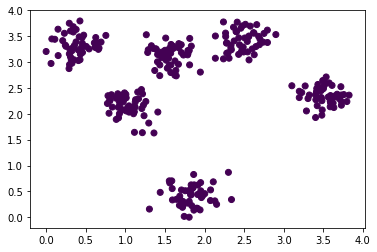

In [2799]:
color = np.ones(points)
plt.scatter(x, y, c=color)

In [2800]:
%%time
#комментарий №3
def log2(x):
    i = 0
    while (2 ** i < x):
        i = i + 0.01
    return i
        
clusters = 0
squaresinline = int(log2(points)) + 9
squaresnumber = squaresinline ** 2
length = 4 / squaresinline

if (points <= 200):
    coefficient = 1.5
else:
    coefficient = 2
    
max1 = int(((points / squaresnumber) + 0.99999) * coefficient)
xsquares = []
ysquares = []

for i in range (0, squaresinline):
    for j in range (0, squaresinline):
        kolvo = 0
        for k in range (1, points):
            if ((x[k] > i*length) and (x[k] <= (i+1)*length) and 
            (y[k] > j*length) and (y[k] <= (j+1)*length)):
                kolvo = kolvo + 1
        if (kolvo > max1):
            clusters = clusters + 1
            xsquares = np.append(xsquares, i)
            ysquares = np.append(ysquares, j)

z = np.zeros(squaresnumber)
z = z.reshape(squaresinline, squaresinline)
for i in range (0, clusters):
    z[int(xsquares[i]), int(ysquares[i])] = 1
    
print(z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
CPU times: user 49.8 ms, sys: 2.37 ms, total: 52.2 ms
Wall time: 56.8 ms


In [2801]:
%%time
#комментарий №4
def delete_one(z, size):
    z1 = copy(z)
    quantity = 0
    for i in range (0, size):
        for j in range (0, size):
            if (z[i][j] == 1):
                sum1 = 0
                if (i != 0):
                    sum1 = sum1 + z1[i-1][j]
                if (j != 0):
                    sum1 = sum1 + z1[i][j-1]
                if (i != size-1):
                    sum1 = sum1 + z1[i+1][j]
                if (j != size-1):
                    sum1 = sum1 + z1[i][j+1]
                sum2 = 0
                if (i != 0):
                    sum2 = sum2 + z[i-1][j]
                if (j != 0):
                    sum2 = sum2 + z[i][j-1]
                if (i != size-1):
                    sum2 = sum2 + z[i+1][j]
                if (j != size-1):
                    sum2 = sum2 + z[i][j+1]
                if ((sum2 == 1) and (sum1 != 0)):
                    quantity = quantity + 1
                    z1[i][j] = 0
    return quantity, z1

def delete_two(z, size):
    z1 = copy(z)
    quantity = 0
    for i in range (0, size):
        if (quantity == 3):
            break
        for j in range (0, size):
            if (z[i][j] == 1):
                sum1 = 0
                if (i != 0):
                    sum1 = sum1 + z1[i-1][j]
                if (j != 0):
                    sum1 = sum1 + z1[i][j-1]
                if (i != size-1):
                    sum1 = sum1 + z1[i+1][j]
                if (j != size-1):
                    sum1 = sum1 + z1[i][j+1]
                sum2 = 0
                if (i != 0):
                    sum2 = sum2 + z[i-1][j]
                if (j != 0):
                    sum2 = sum2 + z[i][j-1]
                if (i != size-1):
                    sum2 = sum2 + z[i+1][j]
                if (j != size-1):
                    sum2 = sum2 + z[i][j+1]
                if ((sum2 == 2) and (sum1 != 0)):
                    quantity = quantity+1
                    z1[i][j] = 0
                if (quantity == 3):
                    break
    return quantity, z1

def delete_distance2(z):
    for i in range (0, squaresinline):
        for j in range (0, squaresinline):
            if (z[i][j] == 1):
                sum1 = 0
                if (i != 0) and (i != 1):
                    if (z[i-1][j] == 1):
                        continue
                    if (z[i-2][j] == 1):
                        sum1 = sum1 + 1
                if (i != squaresinline-1) and (i != squaresinline-2):
                    if (z[i+1][j] == 1):
                        continue
                    if (z[i+2][j] == 1):
                        sum1 = sum1 + 1
                if (j != 0) and (j != 1):
                    if (z[i][j-1] == 1):
                        continue
                    if (z[i][j-2] == 1):
                        sum1 = sum1 + 1
                if (j != squaresinline-1) and (j != squaresinline-2):
                    if (z[i][j+1] == 1):
                        continue
                    if (z[i][j+2] == 1):
                        sum1 = sum1 + 1
                if (sum1 != 0):
                    z[i][j] = 0
    return z

def delete_diagonal(z):
    for i in range (0, squaresinline):
        for j in range (0, squaresinline):
            if (z[i][j] == 1):
                sum1 = 0
                if (i != 0) and (j != 0):
                      sum1 = sum1 + z[i-1][j-1]
                if (i != 0)and (j != squaresinline-1):
                     sum1 = sum1 + z[i-1][j+1]
                if (i != squaresinline-1) and (j != 0):
                    sum1 = sum1 + z[i+1][j-1]
                if (i != squaresinline-1) and (j != squaresinline-1):
                    sum1 = sum1 + z[i+1][j+1]
                sum2 = 0
                if (i != 0):
                    sum2 = sum2 + z[i-1][j]
                if (j != 0):
                    sum2 = sum2 + z[i][j-1]
                if (i != squaresinline-1):
                    sum2 = sum2 + z[i+1][j]
                if (j != squaresinline-1):
                    sum2 = sum2 + z[i][j+1]
                if (sum1 != 0) and (sum1 == 1) and (sum2 == 0):
                    z[i][j] = 0
    return z

z = delete_distance2(z)
z = delete_diagonal(z)

quantity2 = 1
iters = 0
while (quantity2 != 0):
    iters = iters + 1
    quantity1 = 1
    while (quantity1 !=0):
        quantity1, z = delete_one(z, squaresinline)
        iters = iters + 1
    quantity2, z = delete_two(z, squaresinline)
    
print (iters, "итерций работы с матрицей")

#комментарий №5
for i in range (0, squaresinline):
        for j in range (0, squaresinline):
            if (z[i][j] == 1):
                sum1 = 0
                if ((i != 0) and (j != 0)):
                    sum1 = sum1 + z[i-1][j-1]
                if ((i != 0)and (j != squaresinline-1)):
                    sum1 = sum1 + z[i-1][j+1]
                if ((i != squaresinline-1) and (j != 0)):
                    sum1 = sum1 + z[i+1][j-1]
                if ((i != squaresinline-1) and (j != squaresinline-1)):
                    sum1 = sum1 + z[i+1][j+1]
                if (sum1 == 1):
                    z[i][j] = 0
                    
print(z)
clusters = int(z.sum())

12 итерций работы с матрицей
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
CPU times: user 5.96 ms, sys: 967 µs, total: 6.93 ms

In [2802]:
%%time
#комментарий №6
xsquares = []
ysquares = []
centers = []
xcenters = []
ycenters = []

for i in range (0, squaresinline):
        for j in range (0, squaresinline):
            if (z[i][j] == 1):
                xsquares = np.append(xsquares, i)
                ysquares = np.append(ysquares, j)
            
for i in range (0, clusters):
    for j in range (0, points):
        if ((x[j] > xsquares[i]*length) and (x[j] < (xsquares[i]+1)*length) and 
        (y[j] > ysquares[i]*length) and (y[j] < (ysquares[i]+1)*length)):
            centers = np.append(centers, j)
            xcenters = np.append(xcenters, x[j])
            ycenters = np.append(ycenters, y[j])
            break

#комментарий №7
if (clusters == 0) or (clusters == 1):
    clusters = 2
    centers = []
    xcenters = []
    ycenters = []
    max1 = 0
    for i in range (0, points):
        if (x[i] >= max1):
            max1 = copy(x[i])
            number = i
    centers = np.append(centers, number)
    xcenters = np.append(xcenters, x[number])
    ycenters = np.append(ycenters, y[number])
    
    max1 = 0
    for j in range (0, points):
        sum1 = ((x[j] - xcenters[0]) ** 2 + (y[j] - ycenters[0]) ** 2) ** 0.5
        if (sum1 > max1):
            max1 = copy(sum1)
            number = copy(j)
            xj = copy(x[j])
            yj = copy(y[j])
    centers = np.append(centers, number)
    xcenters = np.append(xcenters, xj)
    ycenters = np.append(ycenters, yj)
    
print ("Clusters number:", clusters)

Clusters number: 6
CPU times: user 1.04 ms, sys: 243 µs, total: 1.28 ms
Wall time: 1.11 ms


In [2518]:
#k-means++
"""
centers = []
xcenters = []
ycenters = []
max = 0
a = np.arange(0, points, 1)
for i in range (0, points):
    if x[i] >= max:
        max = copy(x[i])
        number = i
centers = np.append(centers, number)
xcenters = np.append(xcenters, x[number])
ycenters = np.append(ycenters, y[number])

for i in range (1, clusters):
    max = 0
    for j in range (0, points):
        sum = 0
        for k in range (0, i):
            sum = sum + ((x[j]-xcenters[k]) ** 2 + (y[j]-ycenters[k]) ** 2) ** 0.5
        if sum > max:
            a = centers[centers==j].sum()
            if a == 0:
                max = copy(sum)
                number = copy(j)
                xj = copy(x[j])
                yj = copy(y[j])
    centers = np.append(centers, number)
    xcenters = np.append(xcenters, xj)
    ycenters = np.append(ycenters, yj) 
"""

'\ncenters = []\nxcenters = []\nycenters = []\nmax = 0\na = np.arange(0, points, 1)\nfor i in range (0, points):\n    if x[i] >= max:\n        max = copy(x[i])\n        number = i\ncenters = np.append(centers, number)\nxcenters = np.append(xcenters, x[number])\nycenters = np.append(ycenters, y[number])\n\nfor i in range (1, clusters):\n    max = 0\n    for j in range (0, points):\n        sum = 0\n        for k in range (0, i):\n            sum = sum + ((x[j]-xcenters[k]) ** 2 + (y[j]-ycenters[k]) ** 2) ** 0.5\n        if sum > max:\n            a = centers[centers==j].sum()\n            if a == 0:\n                max = copy(sum)\n                number = copy(j)\n                xj = copy(x[j])\n                yj = copy(y[j])\n    centers = np.append(centers, number)\n    xcenters = np.append(xcenters, xj)\n    ycenters = np.append(ycenters, yj) \n'

In [2030]:
#выбор центров случайным образом
"""
random.seed()
a = np.arange(0, points, 1)
centers = []
xcenters = []
ycenters = []
for i in range (0, clusters):
    flag = 0
    while (flag == 0):
        flag = 1
        b = random.randint(0, points-1)
        for j in range (0, i):
            if (centers[j] == b):
                flag = 0
                break
    centers = np.append(centers, b)
    xcenters = np.append(xcenters, x[b])
    ycenters = np.append(ycenters, y[b])
"""

'\nrandom.seed()\na = np.arange(0, points, 1)\ncenters = []\nxcenters = []\nycenters = []\nfor i in range (0, clusters):\n    flag = 0\n    while (flag == 0):\n        flag = 1\n        b = random.randint(0, points-1)\n        for j in range (0, i):\n            if (centers[j] == b):\n                flag = 0\n                break\n    centers = np.append(centers, b)\n    xcenters = np.append(xcenters, x[b])\n    ycenters = np.append(ycenters, y[b])\n'

In [2803]:
%%time
#комментарий №8
numbersofclusters = []
for i in range (0, points):
    distance = 4*(2**0.5)
    for j in range (0, clusters):
        d = ((x[i]-xcenters[j]) ** 2 + (y[i]-ycenters[j]) ** 2) ** 0.5
        if d <= distance:
            distance = copy(d)
            cluster = copy(j)
    numbersofclusters = np.append(numbersofclusters, cluster)

xcentersnew = np.zeros(clusters)
ycentersnew = np.zeros(clusters)
o = np.ones(points)
xi = xcenters - xcentersnew
yi = ycenters - ycentersnew
kolvo = 0

while (xi.any()) or (yi.any()):
    kolvo = kolvo + 1
    xcenters = copy(xcentersnew)
    ycenters = copy(ycentersnew)
    for j in range (0, clusters):
        kolvo = o[numbersofclusters == j].sum()
        if (kolvo != 0):
            xcentersnew[j] = (x[numbersofclusters == j].sum()) / kolvo
            ycentersnew[j] = (y[numbersofclusters == j].sum()) / kolvo
    numbersofclusters = []
    for i in range (0, points):
        distance = 4*(2 ** 0.5)
        for j in range (0, clusters):
            d = ((x[i]-xcentersnew[j]) ** 2 + (y[i]-ycentersnew[j]) ** 2) ** 0.5
            if (d <= distance):
                distance = copy(d)
                cluster = copy(j)
        numbersofclusters = np.append(numbersofclusters, cluster)
    xi = xcenters - xcentersnew
    yi = ycenters - ycentersnew
print("Алгоритм сошелся за", int(kolvo), "итераций")

Алгоритм сошелся за 50 итераций
CPU times: user 40.6 ms, sys: 4.28 ms, total: 44.9 ms
Wall time: 45.6 ms


In [2804]:
#комментарий №9
for i in range (0, clusters):
    min = 0.6
    cluster = 0
    for j in range (i+1, clusters):
        d = ((xcenters[i]-xcenters[j]) ** 2 + (ycenters[i]-ycenters[j]) ** 2) ** 0.5
        if d < 0.6:
            if d < min:
                cluster = j
                min = d
    if min != 0.6:
        clusters = clusters - 1
        for k in range (0, points):
                if numbersofclusters[k] == i:
                    numbersofclusters[k] = copy(cluster)

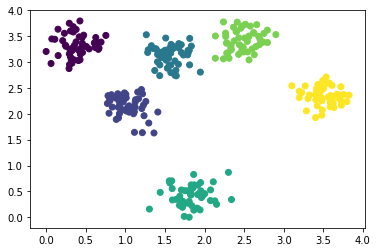

In [2805]:
plt.scatter(x, y, c=numbersofclusters)

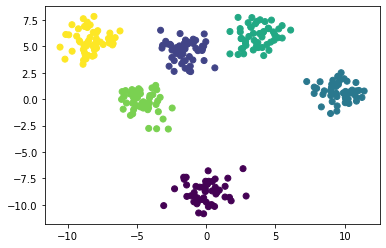

In [2806]:
#комментарий №10
from sklearn.cluster import KMeans
b = KMeans(n_clusters=clusters, random_state=0).fit_predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=b)

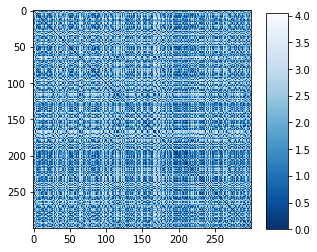

In [2807]:
#комментарий №11
z = np.zeros(points ** 2)
z = z.reshape(points, points)
for i in range (0, points):
    for j in range (i, points):
        distance = ((x[j] - x[i]) ** 2 + (y[j] - y[i]) ** 2) ** 0.5
        z[i][j] = copy(distance)
        z[j][i] = copy(distance)
        
plt.imshow(z, cmap=plt.cm.Blues_r)
cax = plt.axes([0.8, 0.12, 0.05, 0.75])
plt.colorbar(cax=cax)

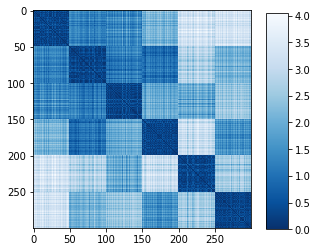

In [2808]:
min1 = 4 * (2 ** 0.5)
for i in range (0, clusters):
    distance = ((0 - xcenters[i]) ** 2 + (4 - ycenters[i]) ** 2) ** 0.5
    if (distance < min1):
        min1 = copy(distance)
        cluster1 = copy(i)

clusters1_1 = np.arange(clusters)
xcenter1 = xcenters[cluster1]
ycenter1 = ycenters[cluster1]
clusters1_1 = np.delete(clusters1_1, cluster1)
clusters1_2 = []
clusters1_2 = np.append(clusters1_2, int(cluster1))

for i in range (0, clusters-1):
    min1 = 4 * (2 ** 0.5)
    for j in range (0, clusters-i-1):
        distance = ((xcenter1 - xcenters[clusters1_1[j]]) ** 2 + 
                    (ycenter1 - ycenters[clusters1_1[j]]) ** 2) ** 0.5
        if (distance < min1):
            min1 = copy(distance)
            newcluster = copy(j)
    clusters1_2 = np.append(clusters1_2, int(clusters1_1[newcluster]))
    clusters1_1 = np.delete(clusters1_1, newcluster)
    
distance1 = 0
for i in range (0, clusters-1):
    distance1 = distance1 + ((xcenters[int(clusters1_2[i+1])] - xcenters[int(clusters1_2[i])]) ** 2 + 
                (ycenters[int(clusters1_2[i+1])] - ycenters[int(clusters1_2[i])]) ** 2) ** 0.5
distance = copy(distance1)
clustersorder = clusters1_2



min1 = 4 * (2 ** 0.5)
for i in range (0, clusters):
    distance = ((0 - xcenters[i]) ** 2 + (0 - ycenters[i]) ** 2) ** 0.5
    if (distance < min1):
        min1 = copy(distance)
        cluster2 = copy(i)

clusters2_1 = np.arange(clusters)
xcenter2 = xcenters[cluster2]
ycenter2 = ycenters[cluster2]
clusters2_1 = np.delete(clusters2_1, cluster2)
clusters2_2 = []
clusters2_2 = np.append(clusters2_2, int(cluster2))

for i in range (0, clusters-1):
    min1 = 4 * (2 ** 0.5)
    for j in range (0, clusters-i-1):
        distance = ((xcenter2 - xcenters[clusters2_1[j]]) ** 2 + (ycenter2 - ycenters[clusters2_1[j]]) ** 2) ** 0.5
        if (distance < min1):
            min1 = copy(distance)
            newcluster = copy(j)
    clusters2_2 = np.append(clusters2_2, int(clusters2_1[newcluster]))
    clusters2_1 = np.delete(clusters2_1, newcluster)
    
distance1 = 0
for i in range (0, clusters-1):
    distance1 = distance1 + ((xcenters[int(clusters2_2[i+1])] - xcenters[int(clusters2_2[i])]) ** 2 + 
                (ycenters[int(clusters2_2[i+1])] - ycenters[int(clusters2_2[i])]) ** 2) ** 0.5
    
if (distance1 < distance):
    distance = copy(distance1)
    clustersorder = clusters2_2
    


min1 = 4 * (2 ** 0.5)
for i in range (0, clusters):
    distance = ((4 - xcenters[i]) ** 2 + (0 - ycenters[i]) ** 2) ** 0.5
    if (distance < min1):
        min1 = copy(distance)
        cluster3 = copy(i)

clusters3_1 = np.arange(clusters)
xcenter3 = xcenters[cluster3]
ycenter3 = ycenters[cluster3]
clusters3_1 = np.delete(clusters3_1, cluster3)
clusters3_2 = []
clusters3_2 = np.append(clusters3_2, int(cluster3))

for i in range (0, clusters-1):
    min1 = 4 * (2 ** 0.5)
    for j in range (0, clusters-i-1):
        distance = ((xcenter3 - xcenters[clusters3_1[j]]) ** 2 + (ycenter3 - ycenters[clusters3_1[j]]) ** 2) ** 0.5
        if (distance < min1):
            min1 = copy(distance)
            newcluster = copy(j)
    clusters3_2 = np.append(clusters3_2, int(clusters3_1[newcluster]))
    clusters3_1 = np.delete(clusters3_1, newcluster)
    
distance1 = 0
for i in range (0, clusters-1):
    distance1 = distance1 + ((xcenters[int(clusters3_2[i+1])] - xcenters[int(clusters3_2[i])]) ** 2 + 
                (ycenters[int(clusters3_2[i+1])] - ycenters[int(clusters3_2[i])]) ** 2) ** 0.5

if (distance1 < distance):
    distance = copy(distance1)
    clustersorder = clusters3_2
    

    
min1 = 4 * (2 ** 0.5)
for i in range (0, clusters):
    distance = ((4 - xcenters[i]) ** 2 + (4 - ycenters[i]) ** 2) ** 0.5
    if (distance < min1):
        min1 = copy(distance)
        cluster4 = copy(i)

clusters4_1 = np.arange(clusters)
xcenter4 = xcenters[cluster4]
ycenter4 = ycenters[cluster4]
clusters4_1 = np.delete(clusters4_1, cluster4)
clusters4_2 = []
clusters4_2 = np.append(clusters4_2, int(cluster4))

for i in range (0, clusters-1):
    min1 = 4 * (2 ** 0.5)
    for j in range (0, clusters-i-1):
        distance = ((xcenter4 - xcenters[clusters4_1[j]]) ** 2 + (ycenter4 - ycenters[clusters4_1[j]]) ** 2) ** 0.5
        if (distance < min1):
            min1 = copy(distance)
            newcluster = copy(j)
    clusters4_2 = np.append(clusters4_2, int(clusters4_1[newcluster]))
    clusters4_1 = np.delete(clusters4_1, newcluster)

distance1 = 0
for i in range (0, clusters-1):
    distance1 = distance1 + ((xcenters[int(clusters4_2[i+1])] - xcenters[int(clusters4_2[i])]) ** 2 + 
                (ycenters[int(clusters4_2[i+1])] - ycenters[int(clusters4_2[i])]) ** 2) ** 0.5

if (distance1 < distance):
    distance = copy(distance1)
    clustersorder = clusters4_2

    
    
xnew = []
ynew = []
for i in clustersorder:
    for j in range (0, points):
        if (numbersofclusters[j] == i):
            xnew = np.append (xnew, x[j])
            ynew = np.append (ynew, y[j])
            
z = np.zeros(points ** 2)
z = z.reshape(points, points)
for i in range (0, points):
    for j in range (i, points):
        distance = ((xnew[j] - xnew[i]) ** 2 + (ynew[j] - ynew[i]) ** 2) ** 0.5
        z[i][j] = copy(distance)
        z[j][i] = copy(distance)
        
plt.imshow(z, cmap=plt.cm.Blues_r)
cax = plt.axes([0.8, 0.12, 0.05, 0.75])
plt.colorbar(cax=cax)